# Aprendizado Supervisionado II - Trabalho 1

## Pacotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics
import numpy as np
import sklearn.metrics as sklm
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns

In [413]:
sms = pd.read_csv('C:\\Users\\malta\\Desktop\\Pós Graduação\\Apredizado Supervisionado II\\Aula 1\\spam.csv', 
                  encoding='ansi')

## Análise exploratória 

In [414]:
sms = sms[['v1', 'v2']]
sms.columns = ['class', 'text']
sms.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [415]:
sms.describe()

,class,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [416]:
sms.groupby('class').describe()

text                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [417]:
sms.isnull().sum()

class    0
text     0
dtype: int64

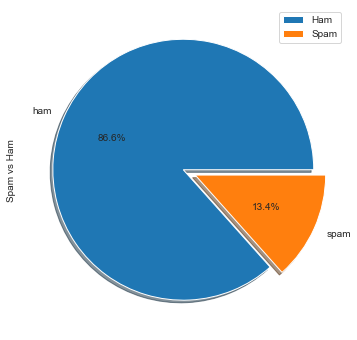

In [418]:
sms['class'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel('Spam vs Ham')
plt.legend(['Ham', 'Spam'])
plt.show()

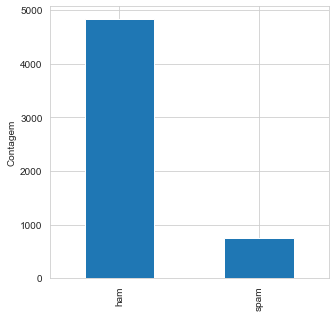

In [419]:
sms['class'].value_counts().plot(kind = 'bar', figsize = (5, 5))
plt.ylabel('Contagem')
plt.show()


Observamos nesses primeiros passos da análise exploratória que há um número muito superior de mensagens legítimas. Apenas 13.4% de todas as mensagens estão classificadas como "spam", enquanto 86.6% é classificada como "ham" (legítima). 


In [420]:
sms['length']=sms['text'].apply(len)
sms.head()

,class,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [421]:
sms.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [422]:
sms[sms['class']=='spam'].length.describe()

count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: length, dtype: float64

In [423]:
sms[sms['class']=='ham'].length.describe()

count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: length, dtype: float64

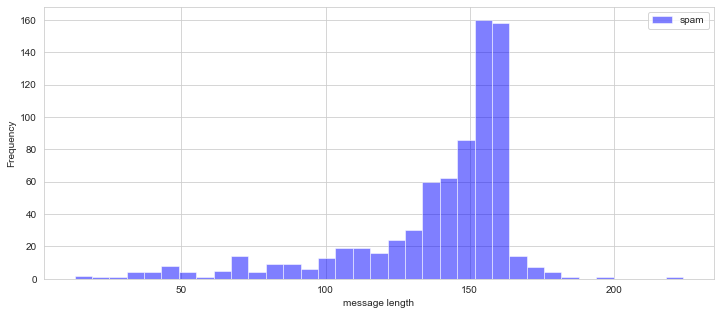

In [424]:
plt.figure(figsize=(12,5))
sms[sms['class']=='spam']['length'].plot(bins=35,kind='hist',color='blue',label='spam',alpha=0.5)
plt.legend()
plt.xlabel('message length')
plt.show()

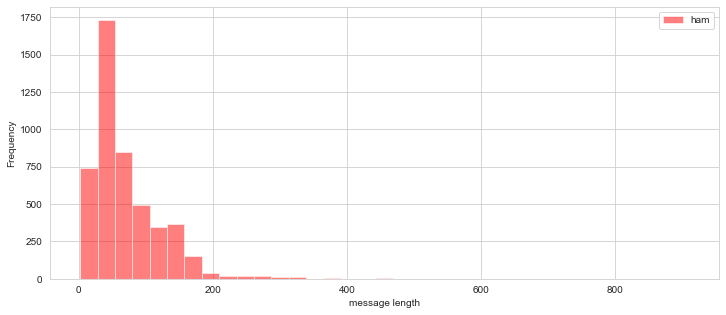

In [425]:
plt.figure(figsize=(12,5))
sms[sms['class']=='ham']['length'].plot(bins=35,kind='hist',color='red',label='ham',alpha=0.5)
plt.legend()
plt.xlabel('message length')
plt.show()

In [426]:
sms['target']=np.where(sms['class']=='spam',1,0)

In [427]:
spam=[]
ham=[]
spam_class=sms[sms['target']==1]['text']
ham_class=sms[sms['target']==0]['text']

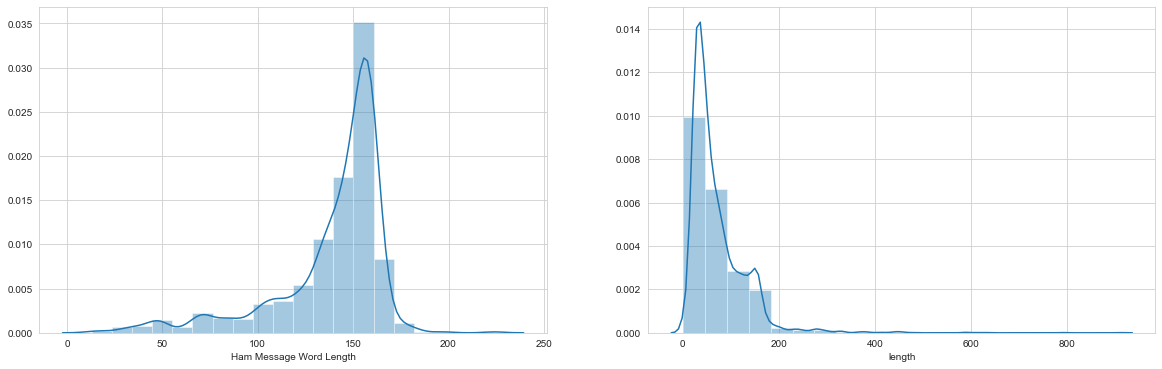

In [428]:
sns.set_style('whitegrid')

f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(sms[sms["target"] == 1]["length"], bins = 20, ax = ax[0])
ax[0].set_xlabel("Spam Message Word Length")

sns.distplot(sms[sms["target"] == 0]["length"], bins = 20, ax = ax[1])
ax[0].set_xlabel("Ham Message Word Length")

plt.show()

Aqui adicionamos uma coluna com a contagem do número de palavras em cada mensagem ao nosso data frame e conseguimos algumas informações interessantes. Temos em média aproximadamente 80 palavras por mensagem, onde a menor mensagem de 2 palavras e a maior 910. Além disso, vemos pelos gráficos que as mensagens de spam são, em média, mais longas que as mensagens legítimas.

In [429]:
count_ham = pd.DataFrame.from_dict(Counter(' '.join(sms[sms['class'] == 'ham']['text']).lower().split()).most_common(50))
count_ham.columns = ['words in ham', 'count']
count_ham.head()

,words in ham,count
0,i,2172
1,you,1665
2,to,1544
3,the,1113
4,a,1046


In [430]:
count_spam = pd.DataFrame.from_dict(Counter(' '.join(sms[sms['class'] == 'spam']['text']).lower().split()).most_common(50))
count_spam.columns = ['words in spam', 'count']
count_spam.head()

,words in spam,count
0,to,682
1,a,373
2,call,342
3,your,263
4,you,252


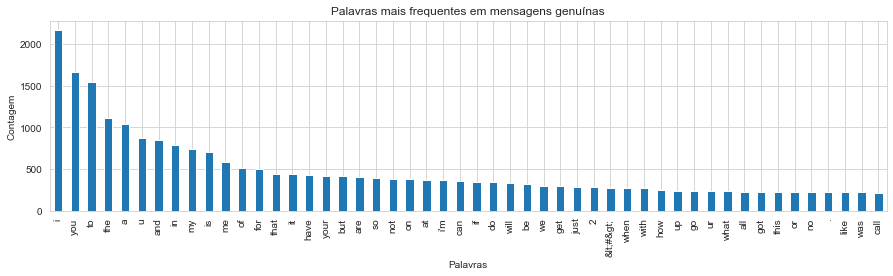

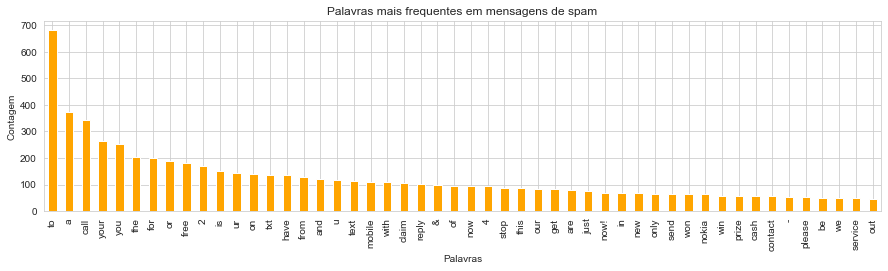

In [431]:
count_ham.plot(kind = 'bar', legend = False, figsize = (15, 3.5))
plt.xticks(np.arange(50), count_ham['words in ham'])
plt.title('Palavras mais frequentes em mensagens genuínas')
plt.xlabel('Palavras')
plt.ylabel('Contagem')
plt.show()

count_spam.plot(kind = 'bar', legend = False, color = 'orange', figsize = (15, 3.5))
plt.xticks(np.arange(50), count_spam['words in spam'])
plt.title('Palavras mais frequentes em mensagens de spam')
plt.xlabel('Palavras')
plt.ylabel('Contagem')
plt.show()


Verificamos as palavras mais comuns para cada tipo de mensagem. Para as mensagens genuínas "i" foi a palavra mais observada e para as mensagens de spam a palavra foi "to".
Essas palavras, assim como algumas das mais frequentes, são comumente classificada como "stop words" e serão removidas na etapa de pré-processamento. 

## Pré-processamento

### Removendo stopwords

In [432]:
feat_ext = feature_extraction.text.CountVectorizer(stop_words = 'english', encoding='ansi')
stop_words = feat_ext.get_stop_words() # Stopwords

In [433]:
words_ham = ' '.join(sms[sms['class'] == 'ham']['text']).lower().split()
words_ham_sw = [word for word in words_ham if word not in stop_words]
words_spam = ' '.join(sms[sms['class'] == 'spam']['text']).lower().split()
words_spam_sw = [word for word in words_spam if word not in stop_words]

In [435]:
#Palavras em 'ham' sem as stopwords
count_ham_sw = pd.DataFrame.from_dict(Counter(words_ham_sw).most_common(50))
count_ham_sw.columns = ['words in ham (wo sw)', 'count']
count_ham_sw.head()

,words in ham (wo sw),count
0,u,874
1,i'm,369
2,just,286
3,2,284
4,&lt;#&gt;,276


In [436]:
#Palavras em 'spam' sem as stopwords
count_spam_sw = pd.DataFrame.from_dict(Counter(words_spam_sw).most_common(50))
count_spam_sw.columns = ['words in spam (wo sw)', 'count']
count_spam_sw.head()

,words in spam (wo sw),count
0,free,180
1,2,169
2,ur,144
3,txt,136
4,u,117


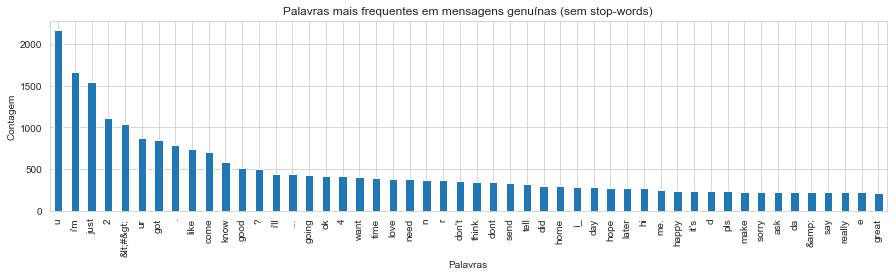

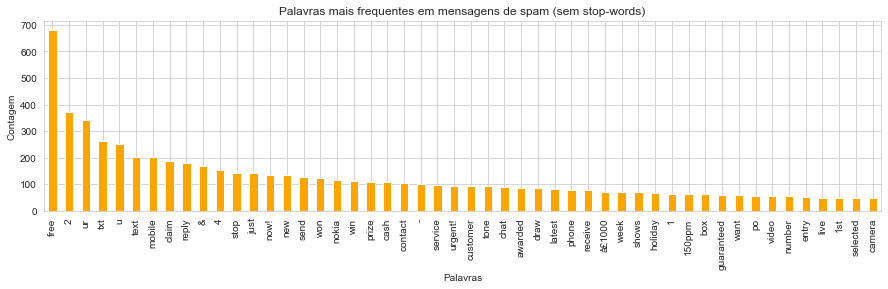

In [437]:
count_ham.plot(kind = 'bar', legend = False, figsize = (15, 3.5))
plt.xticks(np.arange(50), count_ham_sw['words in ham (wo sw)'])
plt.title('Palavras mais frequentes em mensagens genuínas (sem stop-words)')
plt.xlabel('Palavras')
plt.ylabel('Contagem')
plt.show()

count_spam.plot(kind = 'bar', legend = False, color = 'orange', figsize = (15, 3.5))
plt.xticks(np.arange(50), count_spam_sw['words in spam (wo sw)'])
plt.title('Palavras mais frequentes em mensagens de spam (sem stop-words)')
plt.xlabel('Palavras')
plt.ylabel('Contagem')
plt.show()

Ao remover as "stop words", observamos que o gráfico das palavras mais frequentes muda tanto para as mensagens de spam, quanto para as mensagens genuínas. A palavra mais comum nas mensagens genuínas passa a ser "u" e nas mensagens de spam "free". É interessante observar que ofertar algo de graça é o recurso mais usado para chamar a atenção em mensagens de spam. 

## Vetorização e matriz esparsa

### Gerando a matriz esparsa

In [438]:
#Transformando todas as letras para minúsculas
sms['text'] = sms['text'].str.lower()

In [439]:
X = feat_ext.fit_transform(sms['text'])
np.shape(X)

(5572, 8405)

8405 atributos criados, nesse caso, palavras presentes na SMS. Armazenadas em uma matriz esparsa para economizar memória!

Atributo $j$ (coluna) na linha $i$ é igual à quantidade de vezes que a palavra associada ao índice $j$ aparece na SMS de índice $i$.

In [440]:
# Conferindo os tamanhos...
print(np.shape(X))
print(np.shape(sms['class']))
print(np.shape(sms.index))

(5572, 8405)
(5572,)
(5572,)


### Binarizando a matriz X

In [441]:
# Entradas diferentes de zero em X
X.nonzero()

(array([   0,    0,    0, ..., 5570, 5571, 5571]),
 array([4224, 5741, 2271, ..., 1500, 7656, 6323]))

In [442]:
# Tem entradas de fato diferentes de 0 ou 1!

np.sum(X[X.nonzero()] == 2)
#np.sum(X[X.nonzero()] > 1)

1526

In [443]:
X_bin = X.copy()
X_bin[X_bin.nonzero()] = 1

In [444]:
#Matriz esparsa, sem entradas maiores do que 1
X_bin

<5572x8405 sparse matrix of type '<class 'numpy.int64'>'
	with 43479 stored elements in Compressed Sparse Row format>

## Dividindo em conjunto de treinamento e teste

In [446]:
sms["class"]=sms["class"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, sms['class'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8405), (1839, 8405)]


In [445]:
#X_bin_train, X_bin_test, y_train, y_test, idx_train, idx_test = model_selection.train_test_split(
#    X_bin, sms['class'], sms.index, test_size = 0.33)

#print([np.shape(X_bin_train), np.shape(X_bin_test)])

### Classificando


[Questão teórica discursiva] Disserte sobre qual tipo de erro é mais grave de se cometer neste problema: falso negativo ou falso positivo. Com base nisso, diga como o classificador recém construído pode ser utilizado de modo a levar tal informação em consideração; em particular, diga qual métrica de avaliação você julga que faz mais sentido de levar em consideração neste problema.

O erro mais grave de se cometer nesse problema é classificar emails legítimos como spam, isso é, obter falsos positivos. Deveríamos ter um classificador com alta precisão para que esses casos nunca entrassem no nosso modelo. Após essa condição ser cumprida, devemos escolher o modelo com a melhor acurácia.

Testaremos a acurácia de dois tipos de modelo: Bernoiulli e Multinomial.



#### Bayes Ingênuo: Multinomial

Treinaremos diferentes modelos alterando o parâmetro $\alpha$ e, posteriormente, com o conjunto de teste, utilizaremos medidas de avaliação para escolher o melhor possível.

In [447]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [448]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.998661,0.974443,0.920635,0.895753
1,0.11001,0.997857,0.976074,0.936508,0.893939
2,0.22001,0.997857,0.977162,0.936508,0.900763
3,0.33001,0.997589,0.977162,0.936508,0.900763
4,0.44001,0.997053,0.977162,0.936508,0.900763
5,0.55001,0.996250,0.976618,0.936508,0.897338
6,0.66001,0.996518,0.976074,0.932540,0.896947
7,0.77001,0.996518,0.976074,0.924603,0.903101
8,0.88001,0.996250,0.976074,0.924603,0.903101
9,0.99001,0.995982,0.976074,0.920635,0.906250


Como discutido anteriormente, precisamos obter o modelo com a maior precisão dentre os modelos com os diferentes $\alpha$. Aqui observamos que o $\alpha$ que possibilidade isso vale $15.730010$.

In [449]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             15.730010
Train Accuracy     0.979641
Test Accuracy      0.969549
Test Recall        0.777778
Test Precision     1.000000
Name: 143, dtype: float64

In [349]:
models[models['Test Precision']==1].head(n=5)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
143,15.73001,0.979641,0.969549,0.777778,1.0
144,15.84001,0.979641,0.969549,0.777778,1.0
145,15.95001,0.979641,0.969549,0.777778,1.0
146,16.06001,0.979373,0.969549,0.777778,1.0
147,16.17001,0.979373,0.969549,0.777778,1.0


Podemos observar que vários modelos com o mesmo $\alpha$ que permitem não produzir nenhum falso positivo são possíveis. Escolheremos entre esses modelos com precisão igual a $1.0$ aquele com a maior acurácia.

In [450]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             15.730010
Train Accuracy     0.979641
Test Accuracy      0.969549
Test Recall        0.777778
Test Precision     1.000000
Name: 143, dtype: float64

In [451]:
#Matriz de confusão

m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1587,0
Actual 1,56,196


In [452]:
NB_clf2 = naive_bayes.MultinomialNB(alpha=15.730010)
NB_clf2.fit(X_train, y_train)
CM2 = sklm.confusion_matrix(y_test, bayes.predict(X_test)) 

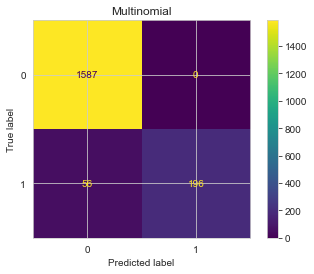

In [453]:
sklm.plot_confusion_matrix(NB_clf2, X_test, y_test)
plt.title("Multinomial")
plt.show()

Conseguimos com que apenas 56 mensagens de spam sejam classificadas como legítimas, enquanto nenhuma mensagem legítima é perdida como spam. Além disso, tivemos uma acurácia de aproximadamente $97\%$.

#### Bayes ingênuo: Bernouilli

Utilizamos o mesmo processo, alterando o parâmetro $\alpha$ até obter a melhor precisão possível.

In [454]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.BernoulliNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

C:\Users\malta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\malta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\malta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\malta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\malta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

In [456]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,1.000000,0.984774,0.916667,0.970588
1,0.11001,0.997589,0.984774,0.940476,0.948000
2,0.22001,0.995446,0.982599,0.932540,0.940000
3,0.33001,0.994642,0.982055,0.928571,0.939759
4,0.44001,0.994107,0.982599,0.912698,0.958333
5,0.55001,0.992231,0.980424,0.888889,0.965517
6,0.66001,0.989017,0.980424,0.880952,0.973684
7,0.77001,0.987142,0.978249,0.861111,0.977477
8,0.88001,0.984999,0.976618,0.849206,0.977169
9,0.99001,0.982320,0.972268,0.817460,0.976303


In [457]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             3.520010
Train Accuracy    0.871953
Test Accuracy     0.867863
Test Recall       0.035714
Test Precision    1.000000
Name: 32, dtype: float64

In [458]:
models[models['Test Precision']==1].head(n=5)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
32,3.52001,0.871953,0.867863,0.035714,1.0
33,3.63001,0.871149,0.866232,0.023810,1.0
34,3.74001,0.869006,0.865688,0.019841,1.0
35,3.85001,0.867667,0.864600,0.011905,1.0
36,3.96001,0.867399,0.863513,0.003968,1.0


In [459]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.BernoulliNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             3.520010
Train Accuracy    0.871953
Test Accuracy     0.867863
Test Recall       0.035714
Test Precision    1.000000
Name: 32, dtype: float64

In [460]:
#Confusion matrix with naive bayes classifier

m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1587,0
Actual 1,243,9


In [461]:
NB_clf = naive_bayes.BernoulliNB(alpha=3.520010)
NB_clf.fit(X_train, y_train)
CM = sklm.confusion_matrix(y_test, bayes.predict(X_test)) 

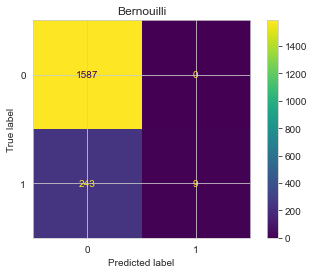

In [462]:
sklm.plot_confusion_matrix(NB_clf, X_test, y_test)
plt.title("Bernouilli")
plt.show()

Para o modelo Bernouilli, o custo para não obter falsos positivos foi detectar $243$ mensagens de spam como legítimas e apenas $9$ verdadeiros positivos. Tivemos uma acurácia de aproximadamente $87\%$.

## Curva ROC

#### Bernouilli

In [465]:
Pop = np.size(y_test)
N = np.size(np.where(y_test == 0))
P = np.size(np.where(y_test == 1))

VN = CM[0, 0] #verdadeiro negativo
FP = CM[0, 1] #falso positivo
FN = CM[1, 0] #falso negativo
VP = CM[1, 1] #verdadeiro positivo
Prev = P/Pop
Acc = (VN + VP)/Pop

FPR = FP/N
TNR = VN/N
TPR = VP/P
FNR = FN/P

FOR = FN/(VN + FN)
PPV = VP/(FP + VP)
NPV = VN/(VN + FN)
FDR = FP/(FP + VP)

F1 = 2/(1/PPV + 1/TPR)
print('Prevalência:', Prev)
print('Acurácia:', Acc)
print('Taxa de falsos positivos:', FPR)
print('Taxa de verdadeiros negativos (Especificidade):', TNR)
print('Taxa de verdadeiros positivos (Recall):', TPR)
print('Taxa de falsos negativos:', FNR)
print('False omission rate:', FOR)
print('Valor preditivo positivo (Precisão):', PPV)
print('Valor preditivo negativo:', NPV)
print('False discovery rate:', FDR)
print('F1 Score:', F1)

Prevalência: 0.1370309951060359
Acurácia: 0.867862969004894
Taxa de falsos positivos: 0.0
Taxa de verdadeiros negativos (Especificidade): 1.0
Taxa de verdadeiros positivos (Recall): 0.03571428571428571
Taxa de falsos negativos: 0.9642857142857143
False omission rate: 0.13278688524590163
Valor preditivo positivo (Precisão): 1.0
Valor preditivo negativo: 0.8672131147540983
False discovery rate: 0.0
F1 Score: 0.06896551724137931


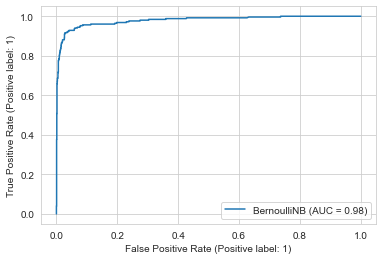

In [410]:
sklm.plot_roc_curve(NB_clf, X_test, y_test)

#### Multinomial

In [464]:
Pop = np.size(y_test)
N = np.size(np.where(y_test == 0))
P = np.size(np.where(y_test == 1))

VN = CM2[0, 0] #verdadeiro negativo
FP = CM2[0, 1] #falso positivo
FN = CM2[1, 0] #falso negativo
VP = CM2[1, 1] #verdadeiro positivo
Prev = P/Pop
Acc = (VN + VP)/Pop

FPR = FP/N
TNR = VN/N
TPR = VP/P
FNR = FN/P

FOR = FN/(VN + FN)
PPV = VP/(FP + VP)
NPV = VN/(VN + FN)
FDR = FP/(FP + VP)

F1 = 2/(1/PPV + 1/TPR)
print('Prevalência:', Prev)
print('Acurácia:', Acc)
print('Taxa de falsos positivos:', FPR)
print('Taxa de verdadeiros negativos (Especificidade):', TNR)
print('Taxa de verdadeiros positivos (Recall):', TPR)
print('Taxa de falsos negativos:', FNR)
print('False omission rate:', FOR)
print('Valor preditivo positivo (Precisão):', PPV)
print('Valor preditivo negativo:', NPV)
print('False discovery rate:', FDR)
print('F1 Score:', F1)

Prevalência: 0.1370309951060359
Acurácia: 0.9695486677542142
Taxa de falsos positivos: 0.0
Taxa de verdadeiros negativos (Especificidade): 1.0
Taxa de verdadeiros positivos (Recall): 0.7777777777777778
Taxa de falsos negativos: 0.2222222222222222
False omission rate: 0.03408399269628728
Valor preditivo positivo (Precisão): 1.0
Valor preditivo negativo: 0.9659160073037127
False discovery rate: 0.0
F1 Score: 0.875


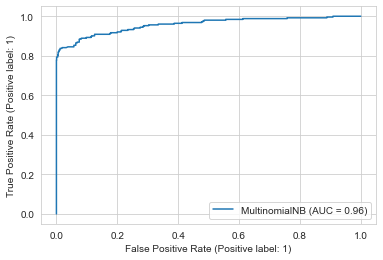

In [412]:
sklm.plot_roc_curve(NB_clf2, X_test, y_test)

## Conclusão

A análise exploratória dos dados de SMS permitiu que observassemos um desbalanceamento no número de mensagens legítimas e de spam, assim como percebessemos uma diferença significativa no número de palavras em cada tipo de texto.

No pré-processamento removemos stopwords para diminuir o espaço dimensional e transformamos todas as letras em minúsculas para não incorrer em palavras repetidas mas digitadas diferentes.

Para esse tipo de análise pareceu muito mais crítico perder mensagens legítimas ao classifica-las como spam do que o contrário, logo optamos por escolher um modelo em que a totalidade dos e-mails legítimos fosse reconhecido. Para isso buscamos obter o modelo com a maior precisão possível que eliminasse a possibilidade de falsos positivos e, entre os modelos possívels com essa precisão, aquele com a maior acurária. 

Foram sugeridos dois modelos de Bayes ingênuo: Bernoulli e Multinomial, e esses modelos apresentaram resultados bem distintos. O modelo Bernoulli para ser capaz de entregar $100\%$ dos falsos positivos apresentou uma taxa de vfalsos negativos extremamente grande. Já o modelo Multinomial foi capaz de detectar esses mesmos falsos positivos classificando apenas 56 dos 252 emails de spam como legítimos, além de apresentar uma acurácia $10\%$ maior. Apesar disso, a área sob a curva ROC é muito semelhante entre os dois modelos.

